In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams
import glob

%matplotlib inline 
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
dfConsulta = pd.read_csv('./data/candidatos-consulta/consulta_cand_2018_BRASIL.csv', sep=";", encoding = 'latin1', error_bad_lines=False)
dfBens = pd.read_csv('./data/candidatos-bens/bem_candidato_2018_BRASIL.csv', sep=";", encoding = 'latin1', error_bad_lines=False)

dfMerged = dfConsulta.merge(dfBens, on='SQ_CANDIDATO')

dfMerged.head()

,DT_GERACAO_x,HH_GERACAO_x,ANO_ELEICAO_x,CD_TIPO_ELEICAO_x,NM_TIPO_ELEICAO_x,NR_TURNO,CD_ELEICAO_x,DS_ELEICAO_x,DT_ELEICAO_x,TP_ABRANGENCIA,...,SG_UF_y,SG_UE_y,NM_UE_y,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,26/09/2018,14:05:54,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,SP,SP,SÃO PAULO,1,11,Apartamento,#NULO#,"26000,00",21/09/2018,14:46:48
1,26/09/2018,14:05:54,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,SP,SP,SÃO PAULO,2,11,Apartamento,#NULO#,"26000,00",21/09/2018,14:46:48
2,26/09/2018,14:05:54,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,SP,SP,SÃO PAULO,3,12,Casa,#NULO#,"54000,00",21/09/2018,14:46:48
3,26/09/2018,14:05:54,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,SP,SP,SÃO PAULO,5,21,"Veículo automotor terrestre: caminhão, automóv...",#NULO#,"2000,00",21/09/2018,14:46:48
4,26/09/2018,14:05:54,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,SP,SP,SÃO PAULO,9,59,Outros créditos e poupança vinculados,#NULO#,"75,00",21/09/2018,14:46:48


In [4]:
dfMergedFilteredBens = dfMerged.filter(items=['NM_URNA_CANDIDATO','NR_PARTIDO','SG_PARTIDO','SQ_CANDIDATO','VR_BEM_CANDIDATO','CD_COR_RACA','DS_COR_RACA','CD_GRAU_INSTRUCAO','DS_GRAU_INSTRUCAO','CD_GENERO','DS_GENERO','NR_IDADE_DATA_POSSE','CD_CARGO','DS_CARGO','SG_UE_y'])

In [5]:
dfMergedFilteredBens["VR_BEM_CANDIDATO"] = dfMergedFilteredBens["VR_BEM_CANDIDATO"].str.replace(',','.').astype(float)

In [6]:
dfMergedFilteredBensSum = dfMergedFilteredBens.groupby(['NM_URNA_CANDIDATO','NR_PARTIDO','SG_PARTIDO','SQ_CANDIDATO','CD_COR_RACA','DS_COR_RACA','CD_GRAU_INSTRUCAO','DS_GRAU_INSTRUCAO','CD_GENERO','DS_GENERO','NR_IDADE_DATA_POSSE','CD_CARGO','DS_CARGO','SG_UE_y'])['VR_BEM_CANDIDATO'].sum().reset_index()

In [7]:
dfMergedFilteredBensSum.to_csv('/home/angeloreale/candidatura-redebahia/teste-python/dados/dfMergedFilteredBensSum.csv', encoding = 'latin1')

In [8]:
dfMergedFilteredBensSum.describe()

,NR_PARTIDO,SQ_CANDIDATO,CD_COR_RACA,CD_GRAU_INSTRUCAO,CD_GENERO,NR_IDADE_DATA_POSSE,CD_CARGO,VR_BEM_CANDIDATO
count,17617.000000,1.761700e+04,17617.000000,17617.000000,17617.000000,17617.000000,17617.000000,1.761700e+04
mean,33.941704,1.550293e+11,1.758415,7.075495,2.478969,49.046319,6.689902,1.363971e+06
std,20.630171,7.284943e+10,0.950638,1.349631,0.853562,11.177035,0.892271,1.920919e+07
min,10.000000,1.000060e+10,1.000000,2.000000,2.000000,19.000000,1.000000,0.000000e+00
25%,17.000000,9.000062e+10,1.000000,6.000000,2.000000,41.000000,6.000000,6.000000e+04
50%,28.000000,1.600006e+11,1.000000,8.000000,2.000000,49.000000,7.000000,2.272017e+05
75%,45.000000,2.200006e+11,3.000000,8.000000,2.000000,57.000000,7.000000,6.500000e+05
max,90.000000,2.800006e+11,5.000000,8.000000,4.000000,89.000000,10.000000,1.202007e+09


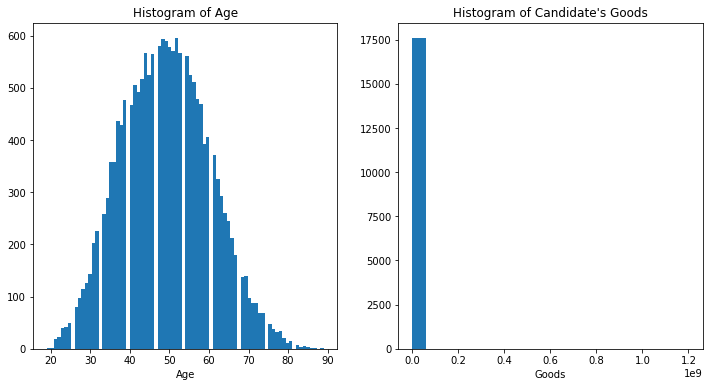

In [9]:
fig = plt.figure(figsize=(12, 6))
age = fig.add_subplot(121)
goods = fig.add_subplot(122)

age.hist(dfMergedFilteredBensSum.NR_IDADE_DATA_POSSE, bins=80)
age.set_xlabel('Age')
age.set_title("Histogram of Age")

goods.hist(dfMergedFilteredBensSum.VR_BEM_CANDIDATO, bins=20)
goods.set_xlabel('Goods')
goods.set_title("Histogram of Candidate's Goods")

plt.show()

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('VR_BEM_CANDIDATO ~ NR_IDADE_DATA_POSSE + CD_COR_RACA + CD_GENERO + CD_GRAU_INSTRUCAO + CD_GENERO + CD_CARGO', dfMergedFilteredBensSum).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:       VR_BEM_CANDIDATO   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     14.12
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           8.16e-14
Time:                        03:11:06   Log-Likelihood:            -3.2041e+05
No. Observations:               17617   AIC:                         6.408e+05
Df Residuals:                   17611   BIC:                         6.409e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.904e+06   1

/home/angeloreale/candidatura-redebahia/teste-python/script/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/angeloreale/candidatura-redebahia/teste-python/script/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


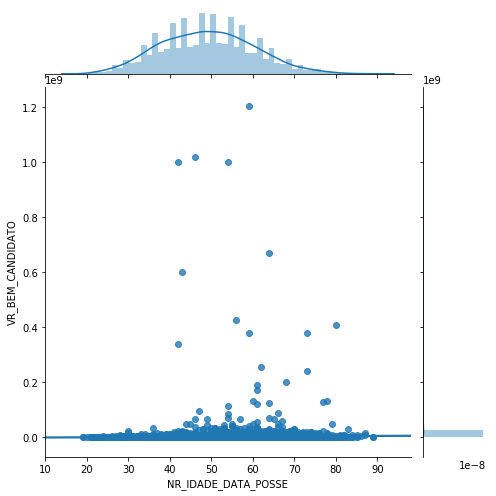

In [11]:
sns.jointplot(x="NR_IDADE_DATA_POSSE", y="VR_BEM_CANDIDATO", data=dfMergedFilteredBensSum, kind = 'reg',fit_reg= True, size = 7)
plt.show()

/home/angeloreale/candidatura-redebahia/teste-python/script/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/angeloreale/candidatura-redebahia/teste-python/script/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


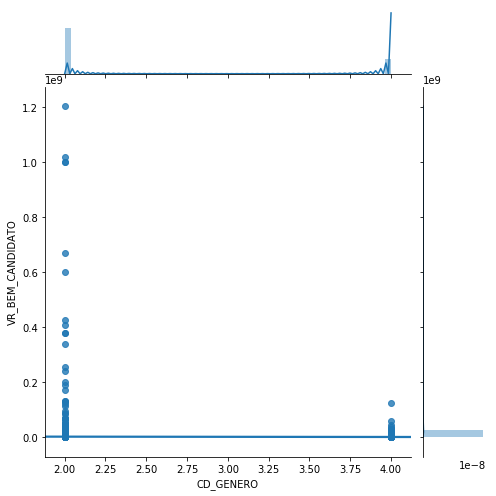

In [13]:
sns.jointplot(x="CD_GENERO", y="VR_BEM_CANDIDATO", data=dfMergedFilteredBensSum, kind = 'reg',fit_reg= True, size = 7)
plt.show()

/home/angeloreale/candidatura-redebahia/teste-python/script/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/angeloreale/candidatura-redebahia/teste-python/script/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


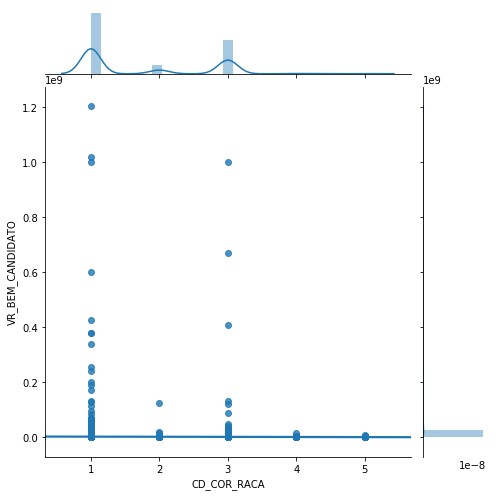

In [14]:
sns.jointplot(x="CD_COR_RACA", y="VR_BEM_CANDIDATO", data=dfMergedFilteredBensSum, kind = 'reg',fit_reg= True, size = 7)
plt.show()

/home/angeloreale/candidatura-redebahia/teste-python/script/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/angeloreale/candidatura-redebahia/teste-python/script/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


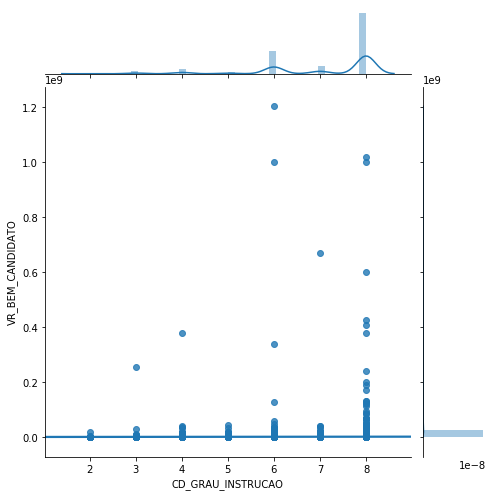

In [15]:
sns.jointplot(x="CD_GRAU_INSTRUCAO", y="VR_BEM_CANDIDATO", data=dfMergedFilteredBensSum, kind = 'reg',fit_reg= True, size = 7)
plt.show()

/home/angeloreale/candidatura-redebahia/teste-python/script/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/angeloreale/candidatura-redebahia/teste-python/script/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


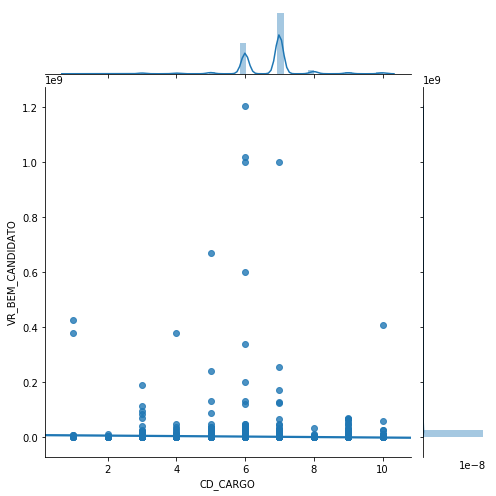

In [16]:
sns.jointplot(x="CD_CARGO", y="VR_BEM_CANDIDATO", data=dfMergedFilteredBensSum, kind = 'reg',fit_reg= True, size = 7)
plt.show()

/home/angeloreale/candidatura-redebahia/teste-python/script/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/angeloreale/candidatura-redebahia/teste-python/script/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


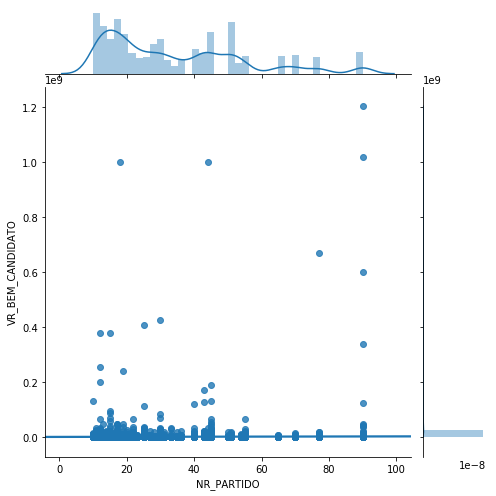

In [17]:
sns.jointplot(x="NR_PARTIDO", y="VR_BEM_CANDIDATO", data=dfMergedFilteredBensSum, kind = 'reg',fit_reg= True, size = 7)
plt.show()

/home/angeloreale/candidatura-redebahia/teste-python/script/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/angeloreale/candidatura-redebahia/teste-python/script/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


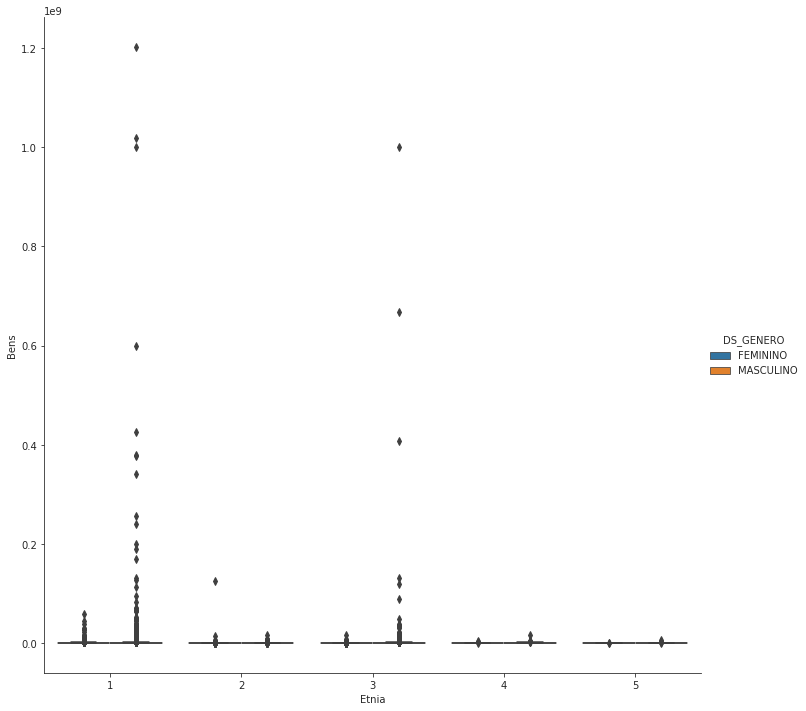

In [147]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("CD_COR_RACA", "VR_BEM_CANDIDATO", "DS_GENERO", data=dfMergedFilteredBensSum, size=10, kind="box")
    g.set_axis_labels("Etnia", "Bens");
    g.savefig('factorplot01.png')